In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# make 100 measurements in the interval
truth = np.linspace(-59.2,59.2,200)
zeros = np.zeros_like(truth)
error_axis = np.linspace(-3,3,200)
measurments = np.random.normal(truth,0.5)

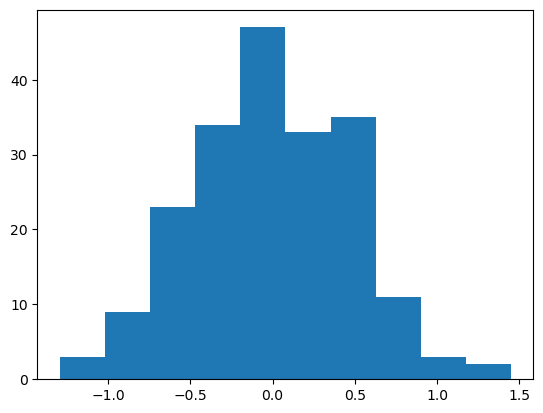

TypeError: rv_frozen.cdf() takes 2 positional arguments but 3 were given

In [4]:
deviation = measurments - truth
std = np.std(deviation)
mean = np.mean(deviation)
plt.hist(deviation)
plt.show()

#calculate the probability of finding measurements within the accuracy limit
p_val = stats.norm(mean, std).cdf(1,-1)
plt.plot(np.random.normal(zeros,std),p_val)
plt.show()
plt.hist(np.random.normal(zeros,std))
plt.show()

In [3]:
std

0.29676506073166764

In [114]:
import numpy as np
import os
import matplotlib.pyplot as plt

cwd = os.getcwd()
plots = os.path.join(cwd,'plots')

data = (np.loadtxt(cwd + r'\data\180_single_q2', skiprows=1, delimiter=',')).T
print(data.shape)
time = (data[0] - data[0][0])*1e-6

(11, 10000)


In [105]:
#stability as a function of time
# segment:
data_segments =  np.split(data[6], 20, axis=0)
time_segments = np.split(time, 20, axis=0)

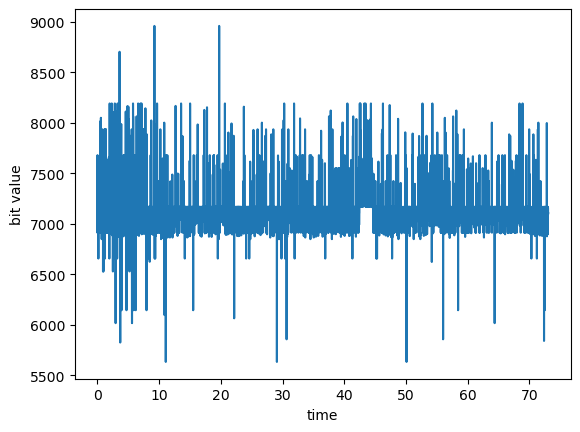

In [116]:
#plot power as time
plt.plot(time, data[4])
plt.ylabel('bit value')
plt.xlabel('time')
plt.savefig(os.path.join(plots,'1q_time.png'))
plt.show()

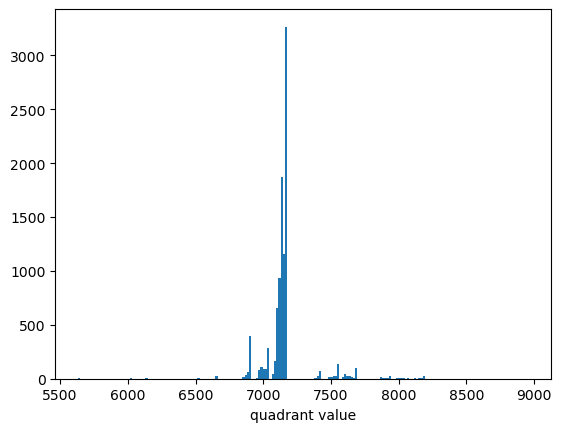

In [121]:
plt.hist(data[4], bins = 200)
plt.xlabel('quadrant value')
plt.savefig(os.path.join(plots,'1Q_hist.png'))
plt.show()

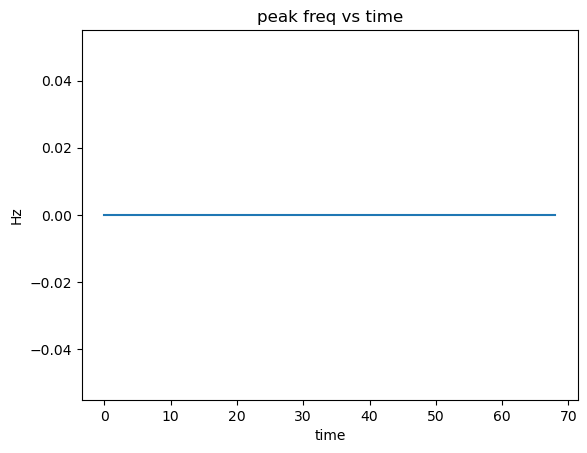

In [112]:
#time dep transform???
freqs = [np.fft.rfftfreq(len(time_segments[i]), time_segments[i][1]-time_segments[i][0]) for i in range(len(time_segments))]
data_fft = [np.fft.rfft(data_segments[i]) for i in range(len(data_segments))]
max = [freqs[i][np.argmax(data_fft[i])] for i in range(len(freqs))]
time = [time_segments[i][0] for i in range(len(time_segments))]

# plot freqs
plt.plot(time, max)
plt.title("peak freq vs time")
plt.ylabel("Hz")
plt.xlabel("time")
plt.show()

In [111]:
time

[0.0,
 1.156761,
 2.270688,
 3.464171,
 4.641616,
 5.759996999999999,
 6.898104999999999,
 8.046768,
 13.046768,
 18.046768999999998,
 23.046768,
 28.046768999999998,
 33.046769,
 38.046769,
 43.046769,
 48.046769,
 53.046769,
 58.046769,
 63.046768,
 68.046768]

In [109]:
np.argmax(data_fft[0])

0

In [108]:
max

[array([  0.        ,   0.91533181,   1.83066362,   2.74599542,
          3.66132723,   4.57665904,   5.49199085,   6.40732265,
          7.32265446,   8.23798627,   9.15331808,  10.06864989,
         10.98398169,  11.8993135 ,  12.81464531,  13.72997712,
         14.64530892,  15.56064073,  16.47597254,  17.39130435,
         18.30663616,  19.22196796,  20.13729977,  21.05263158,
         21.96796339,  22.88329519,  23.798627  ,  24.71395881,
         25.62929062,  26.54462243,  27.45995423,  28.37528604,
         29.29061785,  30.20594966,  31.12128146,  32.03661327,
         32.95194508,  33.86727689,  34.7826087 ,  35.6979405 ,
         36.61327231,  37.52860412,  38.44393593,  39.35926773,
         40.27459954,  41.18993135,  42.10526316,  43.02059497,
         43.93592677,  44.85125858,  45.76659039,  46.6819222 ,
         47.597254  ,  48.51258581,  49.42791762,  50.34324943,
         51.25858124,  52.17391304,  53.08924485,  54.00457666,
         54.91990847,  55.83524027,  56.

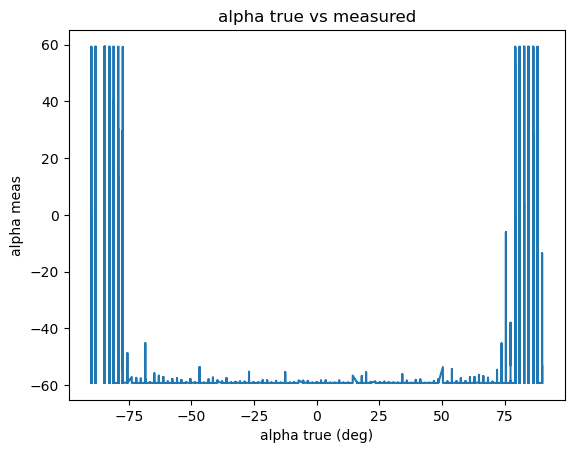

In [91]:
# plot true vs measured alpha
plt.plot(data[1]*0.9/16, data[9])
plt.title("alpha true vs measured")
plt.ylabel("alpha meas")
plt.xlabel("alpha true (deg)")
plt.show()

In [1]:
# Difference between true and fake angle
plt.plot(data[1]*0.9/16, data[9] + data[1]*0.9/16)
plt.title("alpha true vs measured")
plt.ylabel("alpha meas")
plt.xlabel("alpha true (deg)")
plt.show()
dgs = (data[1] * 0.9 / 16 < 59.2) & (data[1] * 0.9 / 16 > -59.2)
(data[9][dgs] + (data[1]*0.9/16)[dgs]).reshape(-1,)
freq = np.fft.rfftfreq(len(time[dgs]), time[1]-time[0])


NameError: name 'plt' is not defined

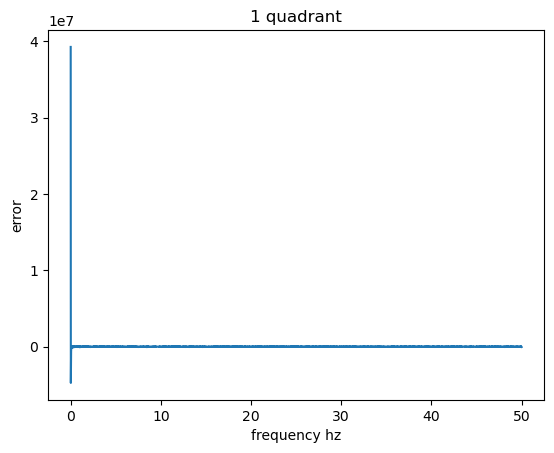

In [98]:
# plot error fourier t
error_fft = np.fft.rfft(data[6][dgs])
plt.plot(freq, error_fft)
plt.title("1 quadrant")
plt.ylabel("error")
plt.xlabel("frequency hz")
plt.savefig(os.path.join(plots,'error_fft.png'))
plt.show()

In [99]:
data[6]

array([  0.,   0.,   0., ..., 511., 770., 511.])

In [72]:
print(freq)

[nan]


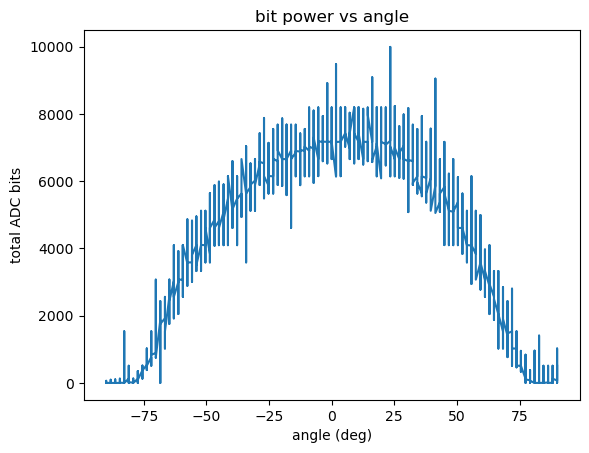

In [95]:
#plot total power
plt.plot(data[1]*0.9/16, data[6])
plt.title("bit power vs angle")
saved = os.path.join(plots,'power_angle.png')
plt.ylabel("total ADC bits")
plt.xlabel("angle (deg)")
plt.savefig(saved)
plt.show()

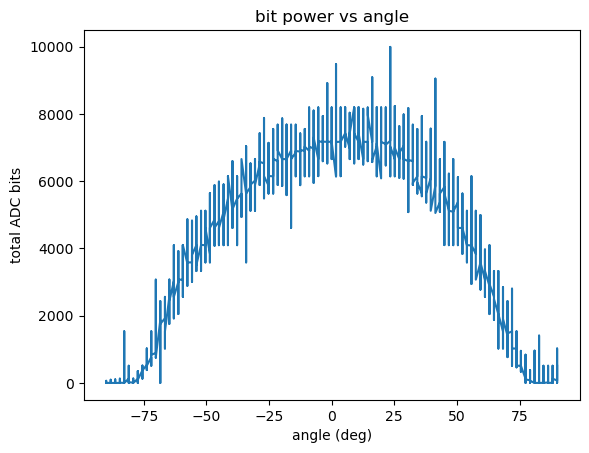

In [100]:
plt.plot(data[1]*0.9/16, data[6])
plt.title("bit power vs angle")
saved = os.path.join(plots,'power_angle.png')
plt.ylabel("total ADC bits")
plt.xlabel("angle (deg)")
plt.savefig(saved)
plt.show()

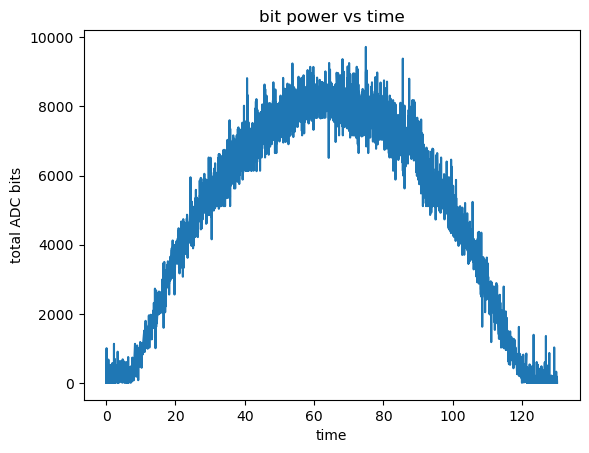

In [52]:
plt.plot(time, data[6])
plt.title("bit power vs time")
saved = os.path.join(plots,'power_time.png')
plt.ylabel("total ADC bits")
plt.xlabel("time")
plt.savefig(saved)
plt.show()

10100


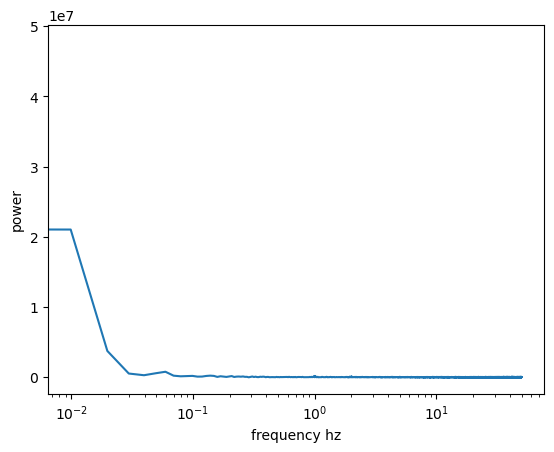

0


In [66]:
#do the fft
print(len(time))
freq = np.fft.rfftfreq(len(time), time[1]-time[0])
pwr_fft = np.abs(np.fft.rfft(data[6]))
plt.plot(freq, pwr_fft)
plt.xscale('log')
plt.ylabel("power")
plt.xlabel("frequency hz")
plt.show()
idxs = np.argmax(pwr_fft)
print(idxs)

In [39]:
time[1]-time[0]

0.09999999999999999